Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

---

# Assignment 4 - Classification

In this assignment, you will practice using the kNN (k-Nearest Neighbors) algorithm to solve a classification problem.
The kNN is a simple and robust classifier, which is used in different applications.

We will use the Iris dataset for this assignment.
The dataset was first introduced by statistician R. Fisher and consists of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width.

The goal is to train kNN algorithm to distinguish the species from one another.

1. The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

2. Download `iris.data` file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris.

3. _(1 points)_ Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

4. _(2 points)_ **Data inspection.** 
    - Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data.
    - Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in different color (`seaborn.lmplot` is recommended for plotting). 

5. _(2 points)_ **Prepare the data for classification**. 
    - Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

6. _(1 point)_ **Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

7. _(2 points)_ **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`. 
    - First, instantiate the model,
    - Then, run the classifier on the training set.

8. _(3 points)_ Use learning model to **predict the class from features**, run prediction on `X` from test part. 
    - Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test.
    - Comparing these two arrays (predicted classes and test `Y`), count the numbers of correct predictions and predictions that were wrong. (**HINTS:** `NumPy` arrays can be compared using `==` operator. You can also use `NumPy`'s operator `count_nonzero` to count number of non-False values).

9. _(4 points)_ In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors `k`. We will use the following **number of neighbors `k`: 1, 3, 5, 7, 10, 20, 30, 40, and 50**:
    - Generate 10 random train/test splits for each value of `k`
    - Fit the model for each split and generate predictions
    - Average the accuracy score for each `k`
    - Calculate the average number of correct predictions for each `k` as well
    - Plot the accuracy score for different values of `k`. What conclusion can you make based on the graph?


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#### Load and Inspect the Data

In [31]:
iris = pd.read_csv('iris.data', sep =',',
                   header = None,
                   names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
                  )

iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [33]:
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


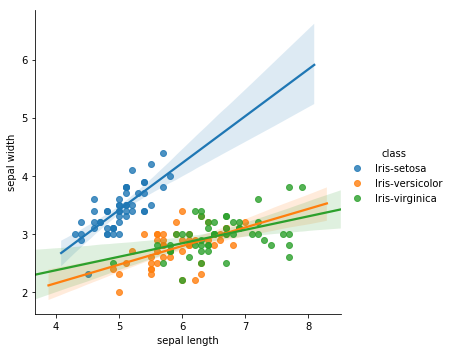

In [34]:
# Scatter plot of sepal length vs sepal width
x1, y1 = 'sepal length', 'sepal width'
sns.lmplot(x1 , y1, hue = 'class', data = iris);

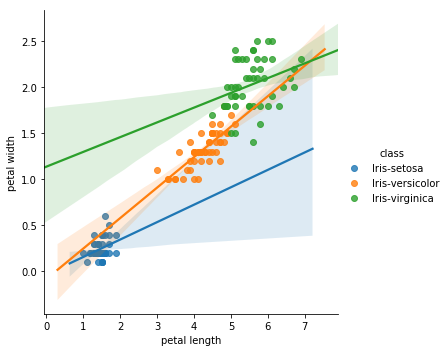

In [35]:
#Scatter plot of petal length vs petal width
x2, y2 = 'petal length',  'petal width'
sns.lmplot(x2, y2, hue = 'class', data = iris);

#### Prepare Data for Classification

In [36]:
iris.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

In [37]:
# convert columns to arrays
X = iris[['sepal length', 'sepal width', 'petal length', 'petal width']].values
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [38]:
# convert response column to an array
Y = iris['class'].values
Y[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

#### Split data into training and test sets

In [39]:
# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=5)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


#### Train model and Evaluate

In [40]:
#Run the fit using KNeighborsClassifier from sklearn.neighbors. In this case, use k=1 to generate the model.
k = 1
classify = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
classify

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [41]:
# Yhat is predicted Y
Yhat = classify.predict(X_test)
print("Test set Accuracy: ", accuracy_score(Y_test, Yhat))

Test set Accuracy:  0.9


In [42]:
correct = np.count_nonzero(Y_test == Yhat)  # to count non-zero (e.i. not False) values
wrong = Y_test.size - correct
print('Number of correct predictions : ', correct)
print('Number of wrong predictions : ', wrong)

Number of correct predictions :  27
Number of wrong predictions :  3


#### Accuracy of the model for different k values

In [72]:
ks = [1, 3, 5, 7, 10, 20, 30, 40, 50]
mean_accuracy = {}
ave_correct = {}

for k in ks:
    acc_score= np.zeros(10)
    correct = np.zeros(10)
    
    for n in range(10): # to generate 10 random train/test split for each k
        X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2)
        # train  and predict
        classify = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
        Yhat = classify.predict(X_test)
        # evaluate accuracy
        acc_score[n] = accuracy_score(Y_test, Yhat)
        correct[n]= np.count_nonzero(Y_test == Yhat)  # to count non-zero (e.i. not False) values
    
    mean_accuracy[k] = round(acc_score.mean(),3)
    ave_correct[k] = correct.mean()
    
df_compare = pd.DataFrame({'Ave Num Correct Predictions': ave_correct, 'Mean Accuracy Score': mean_accuracy}, index = ks)
df_compare.index.name = 'k-values'
df_compare

,Ave Num Correct Predictions,Mean Accuracy Score
k-values,,
1,28.0,0.933
3,28.6,0.953
5,29.2,0.973
7,29.0,0.967
10,28.9,0.963
20,28.4,0.947
30,28.4,0.947
40,28.0,0.933
50,26.3,0.877


#### Plotting accuracy of model as a function of k

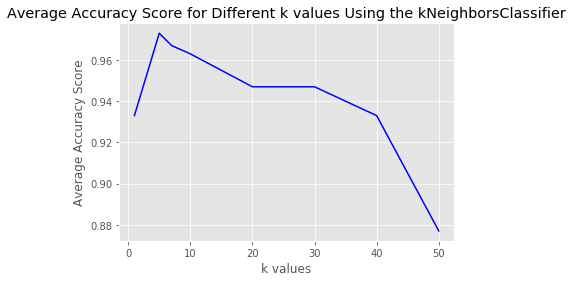

In [73]:
plt.style.use(style='ggplot')
plt.figure(figsize=(6,4))
plt.plot(ks, mean_accuracy.values(), color = 'b')
plt.xlabel('k values')
plt.ylabel('Average Accuracy Score')
plt.title('Average Accuracy Score for Different k values Using the kNeighborsClassifier');

#### Conclusion

In [74]:
import re
highest = max(mean_accuracy.values())
k = {k for k, acc in mean_accuracy.items() if acc == highest}
k =re.sub("{|}","" , str(k))
print( "The best accuracy score was ",highest, "with k =",k) 

The best accuracy score was  0.973 with k = 5
